### Covid-19 Infection Counts Exploration
* author   : santosh
* date     : 04.23.2020
* purpose  : exploration of JH data
* instance : local

<font color='tan'> setup

In [22]:
#data wrangling
import numpy as np
import pandas as pd
import dfply as dfp

#handle datevalues
import datetime as dt

#plotting
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sb
%matplotlib inline

#import helper funcs
from helper_funcs import isUnique

<font color='tan'> ingest JH data

In [33]:
#read csv file
raw_df = pd.read_csv('../data/time_series_covid19_confirmed_global_narrow.csv', sep=',',skiprows=0, parse_dates=['Date'])
raw_df.drop(index=0, axis=0, inplace=True)

In [34]:
raw_df.head()

,Province/State,Country/Region,Lat,Long,Date,Value,ISO 3166-1 Alpha 3-Codes,Region Code,Sub-region Code,Intermediate Region Code
1,NaN,Afghanistan,33.0,65.0,2020-04-23,1279,AFG,142,34,NaN
2,NaN,Afghanistan,33.0,65.0,2020-04-22,1176,AFG,142,34,NaN
3,NaN,Afghanistan,33.0,65.0,2020-04-21,1092,AFG,142,34,NaN
4,NaN,Afghanistan,33.0,65.0,2020-04-20,1026,AFG,142,34,NaN
5,NaN,Afghanistan,33.0,65.0,2020-04-19,996,AFG,142,34,NaN


In [35]:
#rename columns
raw_df.rename(columns={'Country/Region':'Country_Region',
                       'Province/State':'Province_State',
                       'Value':'Cum_Inf_Count',
                       'ISO 3166-1 Alpha 3-Codes':'ISO3166-1Alpha3-Codes',
                       'Region Code':'Region_Code',
                       'Sub-region Code':'Sub_Region_Code',
                       'Intermediate Region Code':'Intermediate_Region_Code'}, inplace=True)

In [36]:
#dataset summary
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24552 entries, 1 to 24552
Data columns (total 10 columns):
Province_State              7626 non-null object
Country_Region              24552 non-null object
Lat                         24552 non-null object
Long                        24552 non-null object
Date                        24552 non-null object
Cum_Inf_Count               24552 non-null object
ISO3166-1Alpha3-Codes       23994 non-null object
Region_Code                 24087 non-null object
Sub_Region_Code             24087 non-null object
Intermediate_Region_Code    8928 non-null object
dtypes: object(10)
memory usage: 2.1+ MB


In [37]:
#check for missing values
print('percentage of missing values: \n')
print(raw_df.isnull().sum() / len(raw_df))

percentage of missing values: 

Province_State              0.689394
Country_Region              0.000000
Lat                         0.000000
Long                        0.000000
Date                        0.000000
Cum_Inf_Count               0.000000
ISO3166-1Alpha3-Codes       0.022727
Region_Code                 0.018939
Sub_Region_Code             0.018939
Intermediate_Region_Code    0.636364
dtype: float64


In [38]:
#recast data types
raw_df['Date'] = pd.to_datetime(raw_df['Date'], errors='coerce')
raw_df['Lat'] = pd.to_numeric(raw_df['Lat'], errors='coerce')
raw_df['Long'] = pd.to_numeric(raw_df['Long'], errors='coerce')
raw_df['Cum_Inf_Count'] = pd.to_numeric(raw_df['Cum_Inf_Count'], errors='coerce')

In [39]:
#add year and month
raw_df['Year'] = raw_df['Date'].dt.year
raw_df['Month'] = raw_df['Date'].dt.month
raw_df['Yr_Mo'] = raw_df['Year'].astype(str) +'_'+ raw_df['Month'].astype(str)

In [40]:
raw_df.dtypes

Province_State                      object
Country_Region                      object
Lat                                float64
Long                               float64
Date                        datetime64[ns]
Cum_Inf_Count                        int64
ISO3166-1Alpha3-Codes               object
Region_Code                         object
Sub_Region_Code                     object
Intermediate_Region_Code            object
Year                                 int64
Month                                int64
Yr_Mo                               object
dtype: object

In [41]:
#make values uppercase
raw_df['Country_Region'] = raw_df['Country_Region'].apply(lambda x:x.upper())

In [42]:
#display sample recs
raw_df.head()

,Province_State,Country_Region,Lat,Long,Date,Cum_Inf_Count,ISO3166-1Alpha3-Codes,Region_Code,Sub_Region_Code,Intermediate_Region_Code,Year,Month,Yr_Mo
1,NaN,AFGHANISTAN,33.0,65.0,2020-04-23,1279,AFG,142,34,NaN,2020,4,2020_4
2,NaN,AFGHANISTAN,33.0,65.0,2020-04-22,1176,AFG,142,34,NaN,2020,4,2020_4
3,NaN,AFGHANISTAN,33.0,65.0,2020-04-21,1092,AFG,142,34,NaN,2020,4,2020_4
4,NaN,AFGHANISTAN,33.0,65.0,2020-04-20,1026,AFG,142,34,NaN,2020,4,2020_4
5,NaN,AFGHANISTAN,33.0,65.0,2020-04-19,996,AFG,142,34,NaN,2020,4,2020_4


In [43]:
isUnique(raw_df, ['Country_Region','Date'])

False

In [44]:
#check duplicates
dup_bool = raw_df.duplicated(subset=['Country_Region','Date'], keep=False)
print('\nCountries with Province_State info: \n')
print(raw_df.loc[dup_bool]['Country_Region'].unique())

#check example of Province and State info
qc = raw_df.loc[dup_bool]
qc.loc[qc['Country_Region'] == 'CHINA'].sort_values(by=['Country_Region','Province_State'], ascending=False).head()


Countries with Province_State info: 

['AUSTRALIA' 'CANADA' 'CHINA' 'DENMARK' 'FRANCE' 'NETHERLANDS'
 'UNITED KINGDOM']


,Province_State,Country_Region,Lat,Long,Date,Cum_Inf_Count,ISO3166-1Alpha3-Codes,Region_Code,Sub_Region_Code,Intermediate_Region_Code,Year,Month,Yr_Mo
8278,Zhejiang,CHINA,29.1832,120.0934,2020-04-23,1268,CHN,142,30,NaN,2020,4,2020_4
8279,Zhejiang,CHINA,29.1832,120.0934,2020-04-22,1268,CHN,142,30,NaN,2020,4,2020_4
8280,Zhejiang,CHINA,29.1832,120.0934,2020-04-21,1268,CHN,142,30,NaN,2020,4,2020_4
8281,Zhejiang,CHINA,29.1832,120.0934,2020-04-20,1268,CHN,142,30,NaN,2020,4,2020_4
8282,Zhejiang,CHINA,29.1832,120.0934,2020-04-19,1268,CHN,142,30,NaN,2020,4,2020_4


<font color='tan'> aggregate data across Country

In [14]:
country_cts = raw_df.groupby(['Country_Region','Date','Year','Month','Yr_Mo'], as_index=False).agg({'Cum_Inf_Count':'sum'})
isUnique(country_cts, ['Country_Region','Date'])

True

In [15]:
#display sample recs
country_cts.loc[country_cts['Country_Region'] == 'US'].tail(10)

,Country_Region,Date,Year,Month,Yr_Mo,Cum_Inf_Count
16451,US,2020-04-14,2020,4,2020_4,607670
16452,US,2020-04-15,2020,4,2020_4,636350
16453,US,2020-04-16,2020,4,2020_4,667592
16454,US,2020-04-17,2020,4,2020_4,699706
16455,US,2020-04-18,2020,4,2020_4,732197
16456,US,2020-04-19,2020,4,2020_4,758809
16457,US,2020-04-20,2020,4,2020_4,784326
16458,US,2020-04-21,2020,4,2020_4,811865
16459,US,2020-04-22,2020,4,2020_4,840351
16460,US,2020-04-23,2020,4,2020_4,869170


In [16]:
#explore country values
country_cts['Country_Region'].unique()

array(['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANDORRA', 'ANGOLA',
       'ANTIGUA AND BARBUDA', 'ARGENTINA', 'ARMENIA', 'AUSTRALIA',
       'AUSTRIA', 'AZERBAIJAN', 'BAHAMAS', 'BAHRAIN', 'BANGLADESH',
       'BARBADOS', 'BELARUS', 'BELGIUM', 'BELIZE', 'BENIN', 'BHUTAN',
       'BOLIVIA', 'BOSNIA AND HERZEGOVINA', 'BOTSWANA', 'BRAZIL',
       'BRUNEI', 'BULGARIA', 'BURKINA FASO', 'BURMA', 'BURUNDI',
       'CABO VERDE', 'CAMBODIA', 'CAMEROON', 'CANADA',
       'CENTRAL AFRICAN REPUBLIC', 'CHAD', 'CHILE', 'CHINA', 'COLOMBIA',
       'CONGO (BRAZZAVILLE)', 'CONGO (KINSHASA)', 'COSTA RICA',
       "COTE D'IVOIRE", 'CROATIA', 'CUBA', 'CYPRUS', 'CZECHIA', 'DENMARK',
       'DIAMOND PRINCESS', 'DJIBOUTI', 'DOMINICA', 'DOMINICAN REPUBLIC',
       'ECUADOR', 'EGYPT', 'EL SALVADOR', 'EQUATORIAL GUINEA', 'ERITREA',
       'ESTONIA', 'ESWATINI', 'ETHIOPIA', 'FIJI', 'FINLAND', 'FRANCE',
       'GABON', 'GAMBIA', 'GEORGIA', 'GERMANY', 'GHANA', 'GREECE',
       'GRENADA', 'GUATEMALA', 'GUINEA', 'GUINE

<font color='blue'> plot cumulative infection counts by country

In [17]:
#plot cases by day for different countries
def showInf(cnt_list):
    """
    this func takes country name as input and displays a chart
    showing number of infections by day
    """
    
    #filter for required country
    p_df = country_cts.loc[country_cts['Country_Region'].isin(cnt_list)].pivot_table(values='Cum_Inf_Count', index=['Date'], columns='Country_Region').reset_index().fillna(0)
    p_df.set_index('Date', inplace=True)
    
    #plot data
    p_df.plot.line(figsize=(14,8))
    plt.title('Cumulative Covid-19 infection counts', size=20)
    plt.xlabel('Date',size=14)
    plt.ylabel('Cumulative Infections', size=14)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.show()

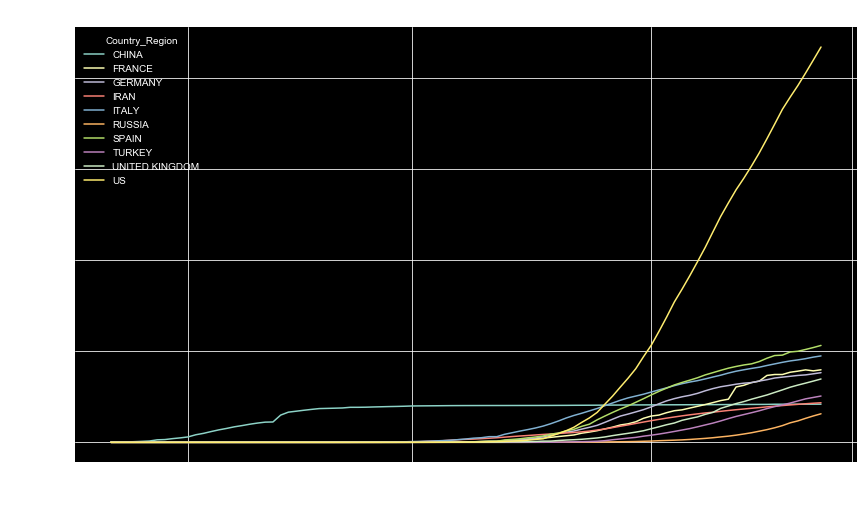

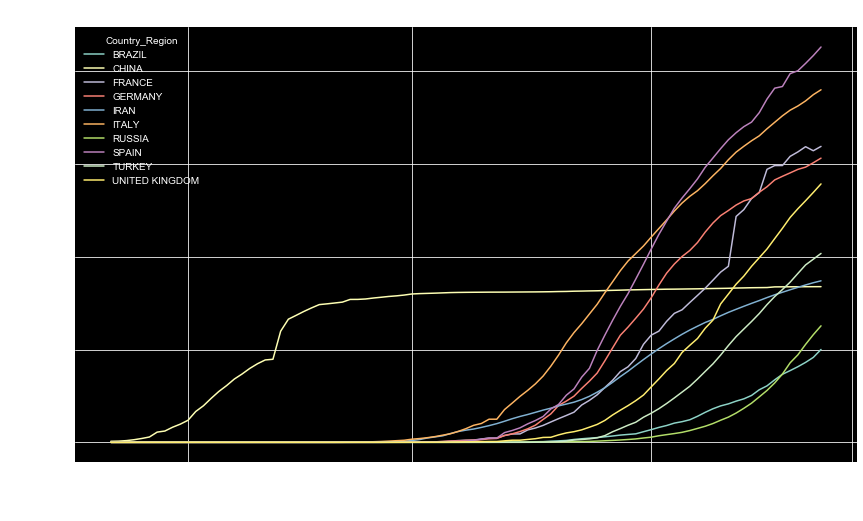

In [23]:
#run func for top10 and top10 ex-US
top_10 = country_cts.groupby(['Country_Region'],as_index=False).agg({'Cum_Inf_Count':'max'}).sort_values(by=['Cum_Inf_Count'], ascending=False).head(10)['Country_Region'].tolist()
top_10_x_us = country_cts.loc[country_cts['Country_Region'] != 'US'].groupby(['Country_Region'],as_index=False).agg({'Cum_Inf_Count':'max'}).sort_values(by=['Cum_Inf_Count'], ascending=False).head(10)['Country_Region'].tolist()

showInf(top_10)
showInf(top_10_x_us)

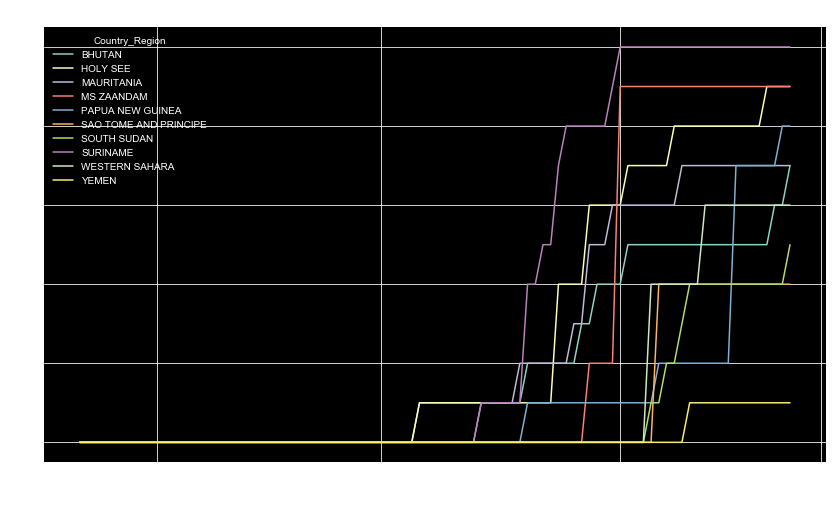

In [21]:
#run func
low_10 = country_cts.groupby(['Country_Region'],as_index=False).agg({'Cum_Inf_Count':'max'}).sort_values(by=['Cum_Inf_Count'], ascending=False).tail(10)['Country_Region'].tolist()
showInf(low_10)

<font color='blue'> append lag dates to compute daily new cases

In [24]:
#func to append lag of infusion counts
def getLags(cnt):
    """
    this func appends lagged cumulative infusion counts
    for an input list of countries supplied
    """
    #filter for required country
    stack = country_cts.loc[country_cts['Country_Region'] == cnt][['Country_Region','Date','Cum_Inf_Count']]
    
    #append lag of cum_inf_count
    stack['Lag_Inf_Count'] = stack['Cum_Inf_Count'].shift(1)
    stack['New_Inf_Count'] = (stack['Cum_Inf_Count'] - stack['Lag_Inf_Count']) + 0
    stack['New_Inf_Count'].fillna(0, inplace=True)
    return stack

In [25]:
#run lags for all countries
country_cts_new = pd.DataFrame()
all_cnt_list = country_cts['Country_Region'].unique()

for item in all_cnt_list:
    tmp = getLags(item)
    country_cts_new = pd.concat([tmp, country_cts_new], axis=0, sort=True)

In [26]:
#plot cases by day for different countries
def showInf(cnt_list):
    """
    this func takes country name as input and displays a chart
    showing number of new infections by day
    """
    
    #filter for required country
    p_df = country_cts_new.loc[country_cts['Country_Region'].isin(cnt_list)].pivot_table(values='New_Inf_Count', index=['Date'], columns='Country_Region').reset_index().fillna(0)
    p_df.set_index('Date', inplace=True)
    
    #plot data
    p_df.plot.line(figsize=(14,8))
    plt.title('New Covid-19 infection counts', size=20)
    plt.xlabel('Date',size=14)
    plt.ylabel('New Infections', size=14)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.show()

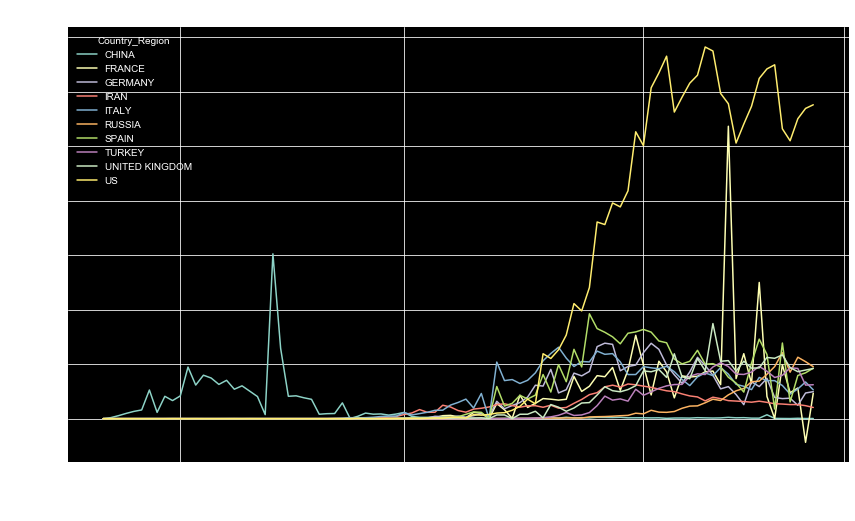

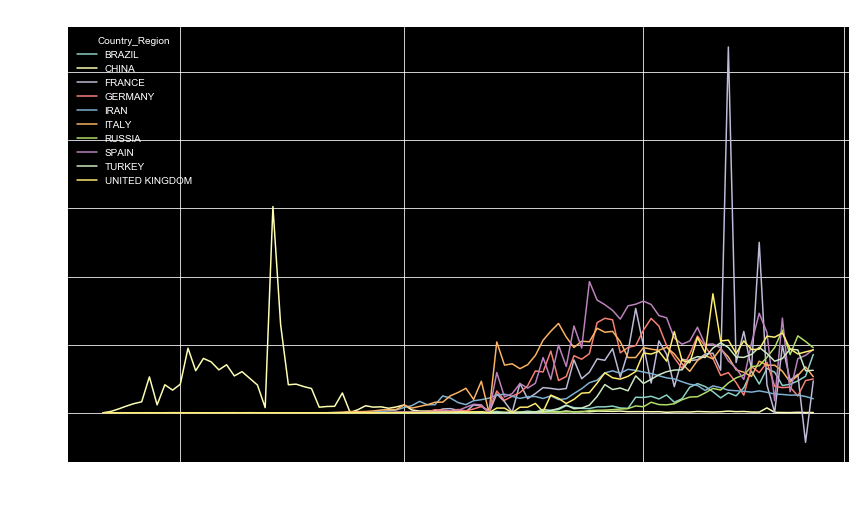

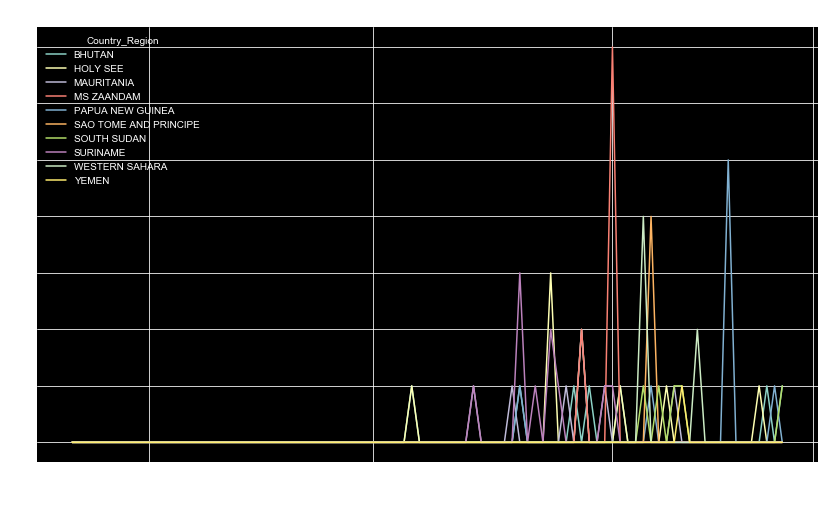

In [28]:
#run func
showInf(top_10)
showInf(top_10_x_us)
showInf(low_10)

In [29]:
country_cts_new.loc[country_cts_new['Country_Region'] == 'FRANCE']

,Country_Region,Cum_Inf_Count,Date,Lag_Inf_Count,New_Inf_Count
5673,FRANCE,0,2020-01-22,NaN,0.0
5674,FRANCE,0,2020-01-23,0.0,0.0
5675,FRANCE,2,2020-01-24,0.0,2.0
5676,FRANCE,3,2020-01-25,2.0,1.0
5677,FRANCE,3,2020-01-26,3.0,0.0
5678,FRANCE,3,2020-01-27,3.0,0.0
5679,FRANCE,4,2020-01-28,3.0,1.0
5680,FRANCE,5,2020-01-29,4.0,1.0
5681,FRANCE,5,2020-01-30,5.0,0.0
5682,FRANCE,5,2020-01-31,5.0,0.0
